# Bike Sharing
- Nama: Evans Hebert
- Email: dabestevanzzacc@gmail.com
- ID Dicoding: evanzzer7

## Menentukan Pertanyaan Bisnis
- Rental sepeda terbanyak pada musim yang mana?
- Bagaimana perbandingan antara rental sepeda saat hari kerja dibandingkan dengan hari libur?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Data Wrangling

### Gathering Data

Day-based Bike Rental Dataset

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Hour-based Bike Rental Dataset

In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Day-based Dataset

Check Information from the dataset

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


No null value detected from the dataset.

Now checking duplicate value from the dataset

In [5]:
print("Duplicate: ", day_df.duplicated().sum())

Duplicate:  0


No Duplicate value exists in the dataset.

Now describing the dataset.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


All data seems pretty normal from the result. No need to take action and can proceed for EDA

#### Hour-based Dataset

Check information from the dataset

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


No null value detected from the dataset.

Now checking duplicate value from the dataset

In [8]:
print("Duplicate: ", hour_df.duplicated().sum())

Duplicate:  0


No Duplicate value exists in the dataset.

Now describing the dataset.

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


All data seems pretty normal from the result. No need to take action and can proceed for EDA

### Cleaning Data

No action is needed as the dataset is assessed and no errors is found.

## Exploratory Data Analysis (EDA)

### Exploring Day-based Dataset

Describing Day-based dataset

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Checking bike rental based on season across 2 years

In [11]:
day_df.groupby('season').agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
    'cnt': ['min', 'max', 'mean', 'sum']
})

casual                            registered                     \
          min   max         mean     sum        min   max         mean   
season                                                                   
1           9  3155   334.928177   60622        416  5315  2269.204420   
2         120  3410  1106.097826  203522        674  6456  3886.233696   
3         118  3160  1202.611702  226091        889  6917  4441.691489   
4           2  3031   729.112360  129782         20  6946  3999.050562   

                 cnt                              
           sum   min   max         mean      sum  
season                                            
1       410726   431  7836  2604.132597   471348  
2       715067   795  8362  4992.331522   918589  
3       835038  1115  8714  5644.303191  1061129  
4       711831    22  8555  4728.162921   841613

Checking bike rental based on working day across 2 years

In [12]:
day_df.groupby('workingday').agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
    'cnt': ['min', 'max', 'mean', 'sum']
})

casual                            registered                     \
              min   max         mean     sum        min   max         mean   
workingday                                                                   
0              54  3410  1371.134199  316732        451  5966  2959.034632   
1               2  2469   606.570000  303285         20  6946  3978.250000   

                     cnt                              
                sum  min   max         mean      sum  
workingday                                            
0            683537  605  8714  4330.168831  1000269  
1           1989125   22  8362  4584.820000  2292410

Describing Hour-based Dataset

In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Check if the sum of the hour-based is the same as the day-based

In [14]:
# Season based popularity
hour_df.groupby('season').agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'cnt': ['sum']
})

,casual,registered,cnt
,sum,sum,sum
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


It seems that the dataset is pretty much the same amount.

Now we can continue by observing hour-based data across all seasons.

In [15]:
hour_df.groupby(['season', 'hr']).agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
    'cnt': ['min', 'max', 'mean', 'sum']
})

casual                       registered                         cnt  \
             min  max       mean   sum        min  max        mean    sum min   
season hr                                                                       
1      0       0   27   3.393258   604          0   87   24.011236   4274   2   
       1       0   25   2.337079   416          0   88   15.803371   2813   1   
       2       0   16   1.794118   305          0   66   11.000000   1870   1   
       3       0   15   1.064103   166          0   51    6.038462    942   1   
       4       0   11   0.474026    73          0   15    2.707792    417   1   
...          ...  ...        ...   ...        ...  ...         ...    ...  ..   
4      19      2  119  29.305085  5187         13  662  267.728814  47388  28   
       20      1   88  22.395480  3964         17  449  189.745763  33585  26   
       21      0   78  18.395480  3256          6  328  142.932203  25299   6   
       22      0   63  15.265537  2702         13  232  108.299435  19169  13   
       23      0   52  10.909605  1931         12  199   75.531073  13369  13   

                                   
           max        mean    sum  
season hr                          
1      0   107   27.404494   4878  
       1   113   18.140449   3229  
       2    80   12.794118   2175  
       3    66    7.102564   1108  
       4    22    3.181818    490  
...        ...         ...    ...  
4      19  743  297.033898  52575  
       20  497  212.141243  37549  
       21  360  161.327684  28555  
       22  264  123.564972  21871  
       23  220   86.440678  15300  

[96 rows x 12 columns]

Observing rental service based on working days hour-based

In [16]:
hour_df.groupby(['workingday', 'hr']).agg({
    'casual': ['min', 'max', 'mean', 'sum'],
    'registered': ['min', 'max', 'mean', 'sum'],
    'cnt': ['min', 'max', 'mean', 'sum']
})

casual                         registered                   \
                 min  max        mean    sum        min  max        mean   
workingday hr                                                              
0          0       0   63   16.647826   3829          4  218   74.152174   
           1       0   49   12.504348   2876          2  139   57.004348   
           2       0   44   10.399123   2371          2  104   42.771930   
           3       0   26    6.453744   1465          2   61   19.321586   
           4       0   13    2.264317    514          0   22    6.000000   
           5       0   16    1.725225    383          0   39    6.963964   
           6       0   17    3.820961    875          0  123   14.921397   
           7       0   35    8.606061   1988          1  367   34.800866   
           8       0   69   20.424242   4718          4  549   85.229437   
           9       0  142   45.017316  10399          6  337  126.606061   
           10      0  209   79.268398  18311         12  351  176.640693   
           11      1  268  106.653680  24637         26  446  208.662338   
           12      4  362  126.246753  29163         26  526  240.012987   
           13      0  355  136.424242  31514         30  491  236.307359   
           14      0  361  139.593074  32246         19  448  225.051948   
           15      0  357  136.502165  31532          4  456  222.311688   
           16      3  367  128.614719  29710          8  473  224.112554   
           17      1  347  111.813853  25829         14  601  211.735931   
           18      0  266   84.221739  19371         23  589  196.834783   
           19      0  230   65.547826  15076         11  461  166.126087   
           20      0  237   46.765217  10756          8  327  127.973913   
           21      0  222   36.147826   8314          6  362  105.913043   
           22      0  175   28.056522   6453          9  327   88.004348   
           23      0   71   19.139130   4402          2  185   66.791304   
1          0       0   68    7.149194   3546          0  234   29.637097   
           1       0   41    3.710526   1833          0   86   12.842105   
           2       0   17    2.137577   1041          0   68    6.546201   
           3       0   17    0.910638    428          0   29    4.031915   
           4       0   11    0.765957    360          0   14    4.663830   
           5       0   10    1.270707    629          1   64   23.642424   
           6       0   19    4.318548   2142          7  203   98.181452   
           7       0   40   12.195565   6049         15  572  278.417339   
           8       0   55   22.264113  11043         31  808  454.741935   
           9       0   75   24.312500  12059         22  399  217.205645   
           10      0  125   31.205645  15478          8  200  104.161290   
           11      0  131   37.598790  18649          5  252  120.631048   
           12      0  199   41.358149  20555          3  312  159.462777   
           13      0  224   42.568273  21199          9  316  155.861446   
           14      0  240   45.869478  22843         12  502  137.702811   
           15      0  233   46.333333  23074         11  423  154.997992   
           16      0  219   48.344689  24124         13  481  244.777555   
           17      0  264   56.895792  28391         19  885  468.394790   
           18      0  237   50.451807  25125         20  886  441.775100   
           19      0  213   41.022088  20429         14  662  307.379518   
           20      0  117   31.369478  15622         17  461  218.349398   
           21      0   91   24.610442  12256          6  330  161.676707   
           22      0   79   19.572289   9747          5  262  118.817269   
           23      0   58   13.379518   6663          8  220   75.329317   

                      cnt                           
                  sum min  max        mean     sum  
workingday hr                  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Rental sepeda terbanyak pada musim yang mana?

#### Day-based Seasonal Rental

In [17]:
season_day_df = day_df.groupby("season").agg({
    'casual': 'sum',
    'registered': 'sum',
}).reset_index().sort_values("season", ascending=False)
season_day_df.head()

,season,casual,registered
3,4,129782,711831
2,3,226091,835038
1,2,203522,715067
0,1,60622,410726


For easier understanding we change numbers in season to Spring, Summer, Autumn, and Winter

In [18]:
season_day_df.season.replace(1, "Spring", inplace=True)
season_day_df.season.replace(2, "Summer", inplace=True)
season_day_df.season.replace(3, "Autumn", inplace=True)
season_day_df.season.replace(4, "Winter", inplace=True)
season_day_df.head()

,season,casual,registered
3,Winter,129782,711831
2,Autumn,226091,835038
1,Summer,203522,715067
0,Spring,60622,410726


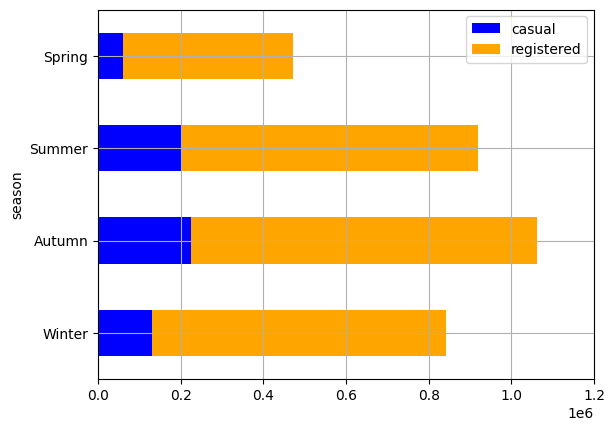

In [19]:
season_day_df.set_index('season').plot(kind='barh', stacked=True, color=['blue', 'orange'])
plt.xlim(0, 1.2e6)
plt.grid()

From the picture, season 3 which is fall season has the most bike rental service.

#### Hour-based Seasonal Rental

In [20]:
season_hour_df = hour_df.groupby(["season", "hr"]).agg({
    'casual': 'mean',
    'registered': 'mean',
}).reset_index().sort_values(["season", "hr"], ascending=True)
season_hour_df.head()

,season,hr,casual,registered
0,1,0,3.393258,24.011236
1,1,1,2.337079,15.803371
2,1,2,1.794118,11.000000
3,1,3,1.064103,6.038462
4,1,4,0.474026,2.707792


In [21]:
season_hour_df.season.replace(1, "Spring", inplace=True)
season_hour_df.season.replace(2, "Summer", inplace=True)
season_hour_df.season.replace(3, "Autumn", inplace=True)
season_hour_df.season.replace(4, "Winter", inplace=True)
season_hour_df.head()

,season,hr,casual,registered
0,Spring,0,3.393258,24.011236
1,Spring,1,2.337079,15.803371
2,Spring,2,1.794118,11.000000
3,Spring,3,1.064103,6.038462
4,Spring,4,0.474026,2.707792


(0.0, 23.0)

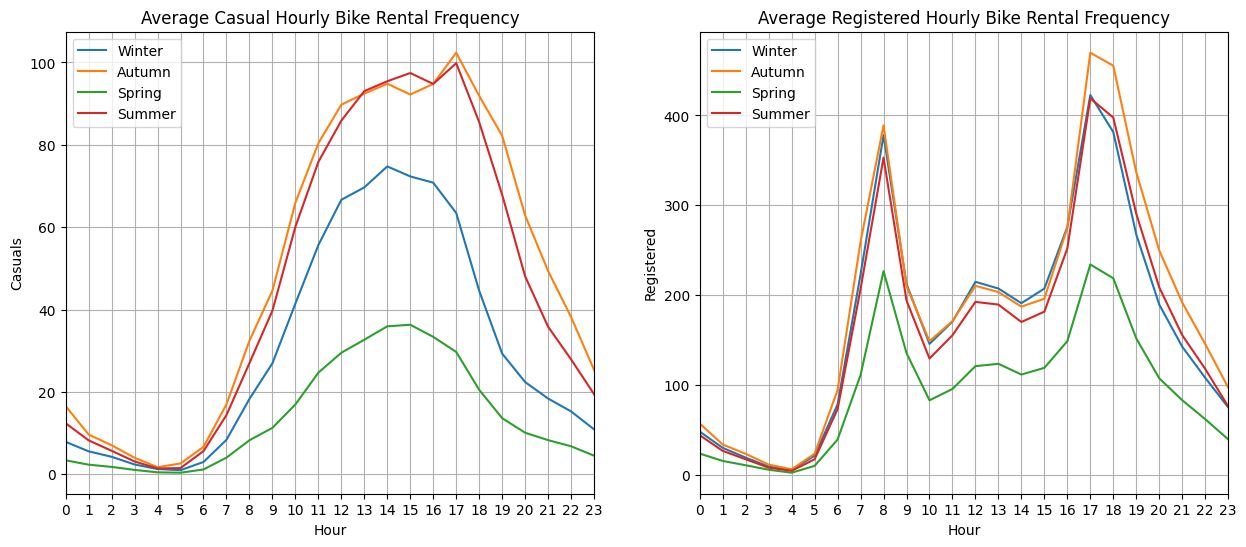

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

work_set = set(season_hour_df["season"])
for work in work_set:
    df = season_hour_df.loc[season_hour_df["season"] == work]
    ax[0].plot(df['hr'], df['casual'], label=work)
    ax[1].plot(df['hr'], df['registered'], label=work)

ax[0].grid()
ax[0].set_title("Average Casual Hourly Bike Rental Frequency")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Casuals")
ax[0].set_xticks(range(0, 24))
ax[0].legend(loc="upper left")
ax[0].set_xlim(0, 23)

ax[1].grid()
ax[1].set_title("Average Registered Hourly Bike Rental Frequency")
ax[1].set_xlabel("Hour")
ax[1].set_ylabel("Registered")
ax[1].set_xticks(range(0, 24))
ax[1].legend(loc="upper left")
ax[1].set_xlim(0, 23)

From the picture, we can see that during the Season 3 (Fall) 5PM has the highest average bike rental of the day, both casuals and registered.

### Pertanyaan 2: Bagaimana perbandingan antara rental sepeda saat hari kerja dibandingkan dengan hari libur?

#### Day-based Working Day Rental

In [23]:
work_day_df = day_df.groupby("workingday").agg({
    'casual': 'mean',
    'registered': 'mean',
}).reset_index().sort_values("workingday")
work_day_df.head()

,workingday,casual,registered
0,0,1371.134199,2959.034632
1,1,606.570000,3978.250000


For Easier Understanding we change 0 to weekends/holidays and 1 to weekdays.

In [24]:
work_day_df.workingday.replace(0, "Weekend", inplace=True)
work_day_df.workingday.replace(1, "Weekday", inplace=True)
work_day_df.head()

,workingday,casual,registered
0,Weekend,1371.134199,2959.034632
1,Weekday,606.570000,3978.250000


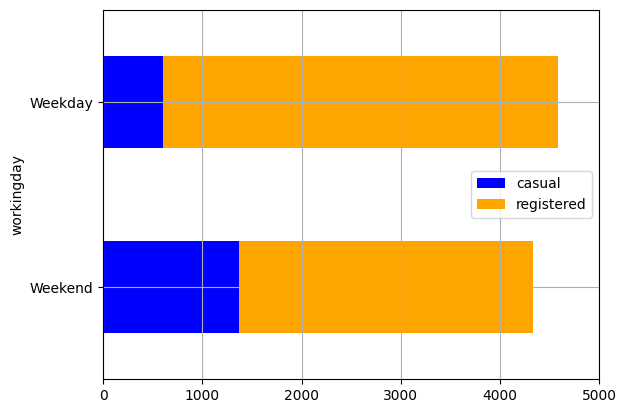

In [25]:
work_day_df.set_index('workingday').plot(kind='barh', stacked=True, color=['blue', 'orange'])
plt.xlim(0, 5000)
plt.grid()

We can infer that bike rental is more popular on weekdays. More registered bike rental users appear on weekdays, but on weekends, more casuals will do bike rental.

#### Hour-based Working Day Rental

In [26]:
work_hour_df = hour_df.groupby(["workingday", "hr"]).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
}).reset_index().sort_values(["workingday", "hr"])
work_hour_df.head()

,workingday,hr,casual,registered,cnt
0,0,0,16.647826,74.152174,90.800000
1,0,1,12.504348,57.004348,69.508696
2,0,2,10.399123,42.771930,53.171053
3,0,3,6.453744,19.321586,25.775330
4,0,4,2.264317,6.000000,8.264317


In [27]:
work_hour_df.workingday.replace(0, "Weekend", inplace=True)
work_hour_df.workingday.replace(1, "Weekday", inplace=True)
work_hour_df.head()

,workingday,hr,casual,registered,cnt
0,Weekend,0,16.647826,74.152174,90.800000
1,Weekend,1,12.504348,57.004348,69.508696
2,Weekend,2,10.399123,42.771930,53.171053
3,Weekend,3,6.453744,19.321586,25.775330
4,Weekend,4,2.264317,6.000000,8.264317


(0.0, 23.0)

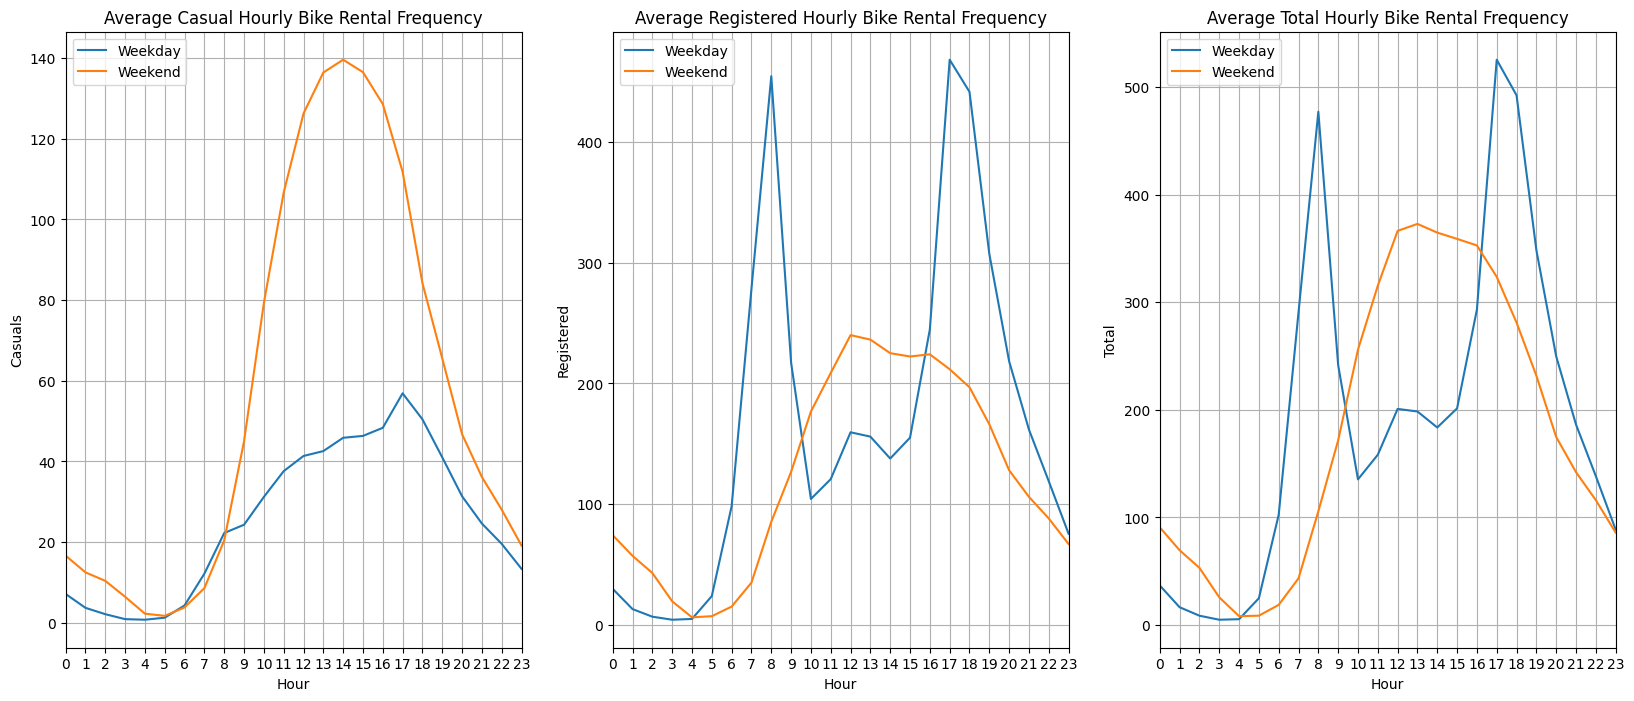

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

work_set = set(work_hour_df["workingday"])
for work in work_set:
    df = work_hour_df.loc[work_hour_df["workingday"] == work]
    ax[0].plot(df['hr'], df['casual'], label=work)
    ax[1].plot(df['hr'], df['registered'], label=work)
    ax[2].plot(df['hr'], df['cnt'], label=work)

ax[0].grid()
ax[0].set_title("Average Casual Hourly Bike Rental Frequency")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Casuals")
ax[0].set_xticks(range(0, 24))
ax[0].legend(loc="upper left")
ax[0].set_xlim(0, 23)

ax[1].grid()
ax[1].set_title("Average Registered Hourly Bike Rental Frequency")
ax[1].set_xlabel("Hour")
ax[1].set_ylabel("Registered")
ax[1].set_xticks(range(0, 24))
ax[1].legend(loc="upper left")
ax[1].set_xlim(0, 23)

ax[2].grid()
ax[2].set_title("Average Total Hourly Bike Rental Frequency")
ax[2].set_xlabel("Hour")
ax[2].set_ylabel("Total")
ax[2].set_xticks(range(0, 24))
ax[2].legend(loc="upper left")
ax[2].set_xlim(0, 23)

We can infer that for casuals, highest rental frequency during weekdays is at 5PM. But during weekends, peak is at 2PM.
But for registered user, highest rental during weekdays is at 8AM and 5PM. During weekends, peak time is at 12PM. But overall peak time on weekends is at 1PM.

## Conclusion

- Peak rental bike season is during fall season, both for casuals and registered user.
- More users will likely rent a bike during weekdays, with peak hour at 8AM and 5PM for overall users, majority for registered users. But during weekends, more casuals will likely rent the bike. Peak hour is around 12PM until 2PM.